# ANP row sensitivity calculations in `pyanp`

## First we import

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, "../")
from pyanp import rowsens

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
pylab.rcParams['figure.figsize'] = (12, 7.5)

In [4]:
np.set_printoptions(suppress=True, precision=4)

# First calculations

## Read in matrix from an Excel sheet

In [5]:
# CSV/sheet sheet with no headers, handle this way
mat4 = rowsens.get_matrix("supermatrix4x4.csv")
display(mat4)

array([[0.5 , 0.1 , 0.  , 0.  ],
       [0.2 , 0.6 , 0.  , 0.  ],
       [0.1 , 0.05, 0.75, 0.1 ],
       [0.2 , 0.25, 0.25, 0.9 ]])

In [6]:
# Excel sheet with headers, handle same way
mat4 = rowsens.get_matrix("supermatrix4x4-headers.csv")
display(mat4)

array([[0.5 , 0.1 , 0.  , 0.  ],
       [0.2 , 0.6 , 0.  , 0.  ],
       [0.1 , 0.05, 0.75, 0.1 ],
       [0.2 , 0.25, 0.25, 0.9 ]])

In [7]:
#Directly inputting the same matrix
mat4 = np.array([[0.5 , 0.1 , 0.  , 0.  ],
       [0.2 , 0.6 , 0.  , 0.  ],
       [0.1 , 0.05, 0.75, 0.1 ],
       [0.2 , 0.25, 0.25, 0.9 ]])
mat4

array([[0.5 , 0.1 , 0.  , 0.  ],
       [0.2 , 0.6 , 0.  , 0.  ],
       [0.1 , 0.05, 0.75, 0.1 ],
       [0.2 , 0.25, 0.25, 0.9 ]])

## Calculate row adjust matrix

In [8]:
rowsens.row_adjust(mat=mat4, row=1, p=0.5, p0mode=0.5)

array([[0.5 , 0.1 , 0.  , 0.  ],
       [0.2 , 0.6 , 0.  , 0.  ],
       [0.1 , 0.05, 0.75, 0.1 ],
       [0.2 , 0.25, 0.25, 0.9 ]])

In [9]:
rowsens.row_adjust(mat=mat4, row=0, p=0.1, p0mode=0.5)

array([[0.1   , 0.02  , 0.    , 0.    ],
       [0.36  , 0.6533, 0.    , 0.    ],
       [0.18  , 0.0544, 0.75  , 0.1   ],
       [0.36  , 0.2722, 0.25  , 0.9   ]])

In [10]:
rowsens.row_adjust(mat=mat4, row=0, p=0.1, p0mode=0.5)

array([[0.1   , 0.02  , 0.    , 0.    ],
       [0.36  , 0.6533, 0.    , 0.    ],
       [0.18  , 0.0544, 0.75  , 0.1   ],
       [0.36  , 0.2722, 0.25  , 0.9   ]])

In [11]:
rowsens.row_adjust(mat=mat4, row=0, p=0.1, p0mode=0.5, cluster_nodes=(0,1))

array([[0.1 , 0.02, 0.  , 0.  ],
       [0.6 , 0.68, 0.  , 0.  ],
       [0.1 , 0.05, 0.75, 0.1 ],
       [0.2 , 0.25, 0.25, 0.9 ]])

In [12]:
rowsens.row_adjust(mat=mat4, row=0, p=0.95, cluster_nodes=(0,1,2))

array([[0.76  , 0.7125, 0.    , 0.    ],
       [0.0267, 0.0346, 0.    , 0.    ],
       [0.0133, 0.0029, 0.75  , 0.1   ],
       [0.2   , 0.25  , 0.25  , 0.9   ]])

In [13]:
rowsens.row_adjust(mat=mat4, row=0, p=0.1, p0mode=0)

array([[0.1788, 0.076 , 0.    , 0.    ],
       [0.3285, 0.616 , 0.    , 0.    ],
       [0.1642, 0.0513, 0.75  , 0.1   ],
       [0.3285, 0.2567, 0.25  , 0.9   ]])

In [14]:
rowsens.row_adjust(mat=mat4, row=0, p=0.1, p0mode=0, cluster_nodes=(0,1))

array([[0.1109, 0.0692, 0.    , 0.    ],
       [0.5891, 0.6308, 0.    , 0.    ],
       [0.1   , 0.05  , 0.75  , 0.1   ],
       [0.2   , 0.25  , 0.25  , 0.9   ]])

## Calculate row adjusted priorities

In [15]:
mat42 = rowsens.get_matrix("supermatrix4x4-2.csv")
# Go ahead and show me the actual priorities
display(mat42)
display(rowsens.calculus(mat42))
display(rowsens.priority(mat42))

array([[0.5 , 0.1 , 0.1 , 0.2 ],
       [0.2 , 0.6 , 0.3 , 0.2 ],
       [0.1 , 0.05, 0.3 , 0.1 ],
       [0.2 , 0.25, 0.3 , 0.5 ]])

array([[0.2209, 0.2209, 0.2209, 0.2209],
       [0.3505, 0.3505, 0.3505, 0.3505],
       [0.1031, 0.1031, 0.1031, 0.1031],
       [0.3255, 0.3255, 0.3255, 0.3255]])

array([0.2209, 0.3505, 0.1031, 0.3255])

In [16]:
rowsens.row_adjust(mat=mat42, row=1, p=0.5, p0mode=0.5)

array([[0.5 , 0.1 , 0.1 , 0.2 ],
       [0.2 , 0.6 , 0.3 , 0.2 ],
       [0.1 , 0.05, 0.3 , 0.1 ],
       [0.2 , 0.25, 0.3 , 0.5 ]])

In [17]:
rowsens.row_adjust_priority(mat=mat42, row=0, p=0.1, p0mode=0.5)

array([0.0308, 0.3479, 0.0947, 0.3364])

In [18]:
rowsens.row_adjust_priority(mat=mat42, row=0, p=0.1, p0mode=0)

array([0.1158, 0.3511, 0.0998, 0.3282])

## Row sensitivity table

In [30]:
rowsens.influence_table(mat=mat42, row=0, p0mode=0.5, pvals=[0.05, 0.25, 0.45, 0.55, 0.75, 0.95], graph=False)

,x,Node 1,Node 2,Node 3
0,0.05,0.446071,0.120199,0.433730
1,0.25,0.447966,0.125667,0.426366
2,0.45,0.449553,0.131009,0.419438
3,0.55,0.443208,0.140904,0.415887
4,0.75,0.420877,0.170626,0.408498
5,0.95,0.403701,0.194678,0.401620


In [35]:
info = rowsens.influence_table(mat=mat42, row=0, p0mode=0, pvals=[0.05, 0.25, 0.45, 0.55, 0.75, 0.95], graph=False, return_p0vals=True)
info[1]

Node 1    (0.20151466567508464, 0.4455831568563379)
Node 2     (0.2772381012245286, 0.1338053437448815)
Node 3       (0.2303361586922446, 0.41952169846835)
dtype: object

In [24]:
# Let's do it with smart p0 instead
rowsens.influence_table(mat=mat42, row=0, p0mode=0, pvals=[0.05, 0.25, 0.45, 0.55, 0.75, 0.95], graph=False)

,x,Node 1,Node 2,Node 3
0,0.05,0.453185,0.123807,0.428478
1,0.25,0.443151,0.131877,0.418545
2,0.45,0.418755,0.146036,0.425080
3,0.55,0.408400,0.153547,0.427585
4,0.75,0.390719,0.167489,0.431441
5,0.95,0.376333,0.180082,0.434094


In [26]:
rowsens.influence_table(mat=mat42, row=0, p0mode=0, pvals=[0.05, 0.25, 0.45, 0.55, 0.75, 0.95], graph=False, return_p0vals=True)[1]

Node 1    (0.20151466567508464, 0.4455831568563379)
Node 2     (0.2772381012245286, 0.1338053437448815)
Node 3       (0.2303361586922446, 0.41952169846835)
dtype: object

## Row sensitivity graph

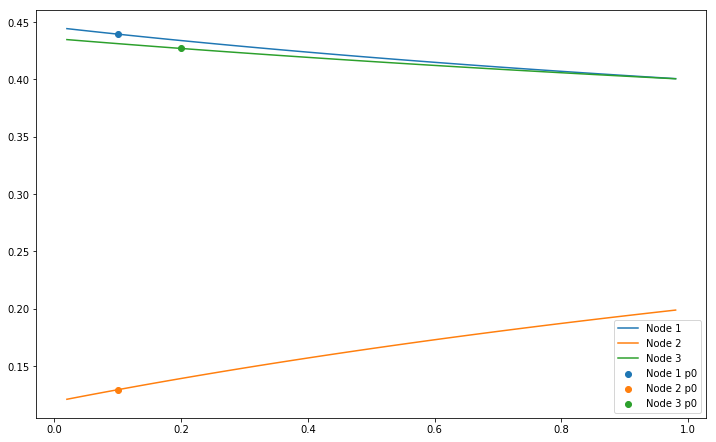

In [38]:
rowsens.influence_table(mat=mat42, row=0, p0mode=None)

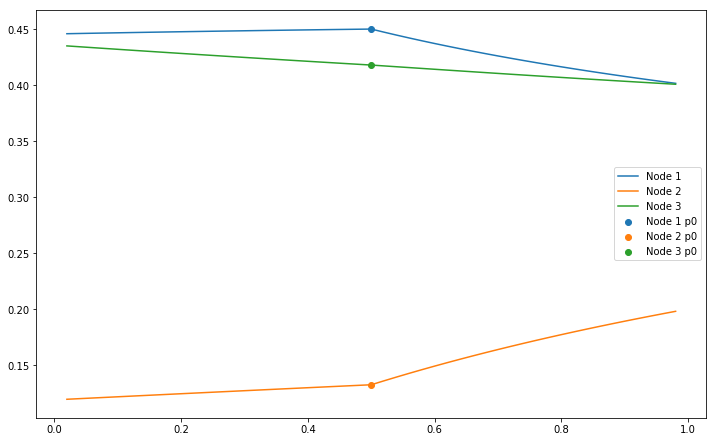

In [39]:
rowsens.influence_table(mat=mat42, row=0, p0mode=0.5)